In [1]:
import numpy as np 
import pandas as pd 
import librosa
import textgrids

In [540]:
FRAME_DURATION = 30
OVERLAP_RATE = 0.0

In [542]:
def readFile(path):
    '''
    Read the file and return the list of SPEECH/NONSPEECH labels for each frame
    '''

    labeled_list  = []
    grid = textgrids.TextGrid(path)

    for interval in grid['silences']:
        label = int(interval.text)

        dur = interval.dur
        dur_msec = dur * 1000 # sec -> msec
        num_frames = int(round(dur_msec /30)) # the audio is divided into 30 msec frames
        for i in range(num_frames):

            labeled_list.append(label)

    return labeled_list

In [544]:
column_names = [f'mfcc{i+1}' for i in range(12)]
column_names.extend(['zcr','rms','labels'])
df = pd.DataFrame(columns = column_names)
df

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,zcr,rms,labels


In [546]:
def addData(df, audio_path, annotation_path):
    data, fs = librosa.load(audio_path)
    label_list = readFile(annotation_path)
    label = np.array(label_list)
    Ns = len(data)  
    Ts = 1 / fs  
    t = np.arange(Ns) * 1000 * Ts  
    shift = 1 - OVERLAP_RATE
    frame_length = int(np.floor(FRAME_DURATION * fs / 1000))
    frame_shift = round(frame_length * shift)
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=frame_shift)
    rms_energy = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=frame_shift)
    mfccs = librosa.feature.mfcc(y=data, n_mfcc=12, hop_length=frame_shift, n_fft=frame_length)
    mfccs = mfccs.T
    zcr = zcr.T
    rms = rms_energy.T
    mini = label.shape[0]
    mini = min(mini,mfccs.shape[0])
    mini = min(mini,rms.shape[0])
    mini = min(mini,zcr.shape[0])
    combined_array = np.hstack((mfccs, zcr, rms))
    combined_array = combined_array[:mini]
    label = label[:mini]
    label = label.reshape(mini,1)
    d = np.hstack((combined_array,label))
    new_df = pd.DataFrame(d, columns = column_names)
    df = pd.concat([df, new_df], ignore_index=True)
    return new_df

In [568]:
import os


audio_directory = "Data/Data/Audio/Noizeus/Car"
annotation_directory = "Data/Data/Annotation/Noizeus/Car"
column_names = [f'mfcc{i+1}' for i in range(12)]
column_names.extend(['zcr','rms','labels'])
df = pd.DataFrame(columns = column_names)

audio_files = sorted([f for f in os.listdir(audio_directory) if f.endswith(('.mp3', '.wav', '.flac', '.aac', '.ogg', '.m4a'))])
annotation_files = sorted([f for f in os.listdir(annotation_directory) if f.endswith('.TextGrid')])  # Assume annotations are .txt files


for audio_file in audio_files:

    base_name = os.path.splitext(audio_file)[0]
    

    annotation_file = f"{base_name}.TextGrid"  

    # Construct full paths
    audio_path = os.path.join(audio_directory, audio_file)
    annotation_path = os.path.join(annotation_directory, annotation_file)

    # Check if the annotation file exists
    if os.path.exists(annotation_path):
        print(f"Audio: {audio_path}")
        print(f"Annotation: {annotation_path}")
        temp = addData(df,audio_path,annotation_path)
        df = pd.concat([df, temp], ignore_index=True)
    else:
        print(f"Warning: No annotation file found for {audio_file_path}")

Audio: Data/Data/Audio/Noizeus/Car\sp01_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp01_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp02_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp02_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp03_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp03_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp04_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp04_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp05_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp05_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp06_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp06_car_sn5.TextGrid


C:\Users\nilay\AppData\Local\Temp\ipykernel_16076\3795589420.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)
C:\Users\nilay\AppData\Local\Temp\ipykernel_16076\3757801250.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


Audio: Data/Data/Audio/Noizeus/Car\sp07_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp07_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp08_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp08_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp09_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp09_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp10_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp10_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp11_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp11_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp12_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp12_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp13_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp13_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp14_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp14_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp15_car_sn5.

In [569]:
dfna = df.dropna()
y = dfna['labels']
X = dfna.drop(columns = ['labels'])

In [570]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [571]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [572]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set random seed for reproducibility (optional)
np.random.seed(42)
tf.random.set_seed(42)

# Define the MLP model
model = Sequential()

# Input layer with 15 dimensions
# First hidden layer with 8 nodes, ReLU activation, and dropout
model.add(Dense(150, activation='relu', input_shape=(X.shape[1],)))
# Second hidden layer with 4 nodes, ReLU activation, and dropout
model.add(Dense(50, activation='relu'))

# Output layer with a single node and sigmoid activation
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    epsilon=1e-07,
    name='adam'
)
# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

D:\Acads\Semester 9\Thesis\Code\vad\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                     │ (None, 150)                 │           2,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,851 (38.48 KB)

 Trainable params: 9,851 (38.48 KB)

 Non-trainable params: 0 (0.00 B)

In [573]:
history = model.fit(X_train, y_train, epochs=90, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4101 - loss: 0.7378 - val_accuracy: 0.4309 - val_loss: 0.7270
Epoch 2/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4389 - loss: 0.7249 - val_accuracy: 0.4637 - val_loss: 0.7158
Epoch 3/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4708 - loss: 0.7124 - val_accuracy: 0.4871 - val_loss: 0.7049
Epoch 4/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5091 - loss: 0.7002 - val_accuracy: 0.5152 - val_loss: 0.6944
Epoch 5/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5434 - loss: 0.6885 - val_accuracy: 0.5597 - val_loss: 0.6843
Epoch 6/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5876 - loss: 0.6771 - val_accuracy: 0.5738 - val_loss: 0.6745
Epoch 7/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6191 - loss: 0.6662 - val_accuracy: 0.6019 - val_loss: 0.6649
Epoch 8/90
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6528 - loss: 0.6557 - val_accuracy: 0.6370 - val_loss:

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.8146067415730337
Precision: 0.815721444858709
FAR: 0.19148936170212766
FRR: 0.1806020066889632


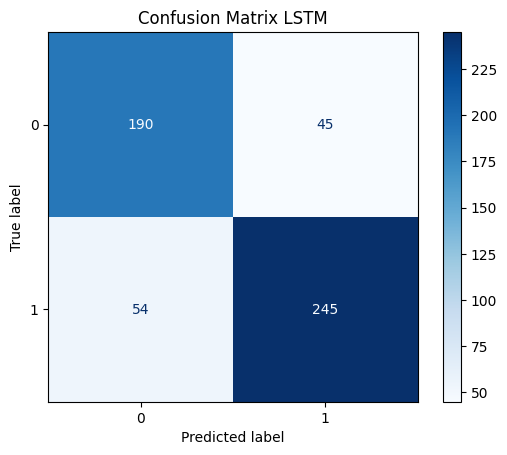

In [574]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
far = cm[0][1]/(cm[0][0]+cm[0][1])
frr = cm[1][0]/(cm[1][0]+cm[1][1])
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"FAR: {far}")
print(f"FRR: {frr}")

# Step 4: Visualize the results with a confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix LSTM")
plt.show()

In [575]:
cm[0][0]

np.int64(190)